# Decision Tree ML Algorithom 

In [32]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sb
import warnings as wr
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt
smoking_data=pd.read_csv('Smoking Data.csv')

In [93]:
smoking_data.head() # show dataset 5 rows

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder#import encoding algorithom

In [4]:
le=LabelEncoder()#crate object

In [5]:
smoking_data['region']=le.fit_transform(smoking_data[['region']])#transform value

In [94]:
smoking_data['sex']=le.fit_transform(smoking_data[['sex']]) # transform value

In [95]:
smoking_data.head() # show dataset 5 rows

,region,age,sex,bmi,children,smoker
0,southwest,19,0,27.900,0,yes
1,southeast,18,1,33.770,1,no
2,southeast,28,1,33.000,3,no
3,northwest,33,1,22.705,0,no
4,northwest,32,1,28.880,0,no


In [8]:
#Splitting the dataset
x=smoking_data.drop('smoker',axis=1)
y=smoking_data[['smoker']]

In [9]:
from sklearn.model_selection import train_test_split as tts#import train test algorithom

In [10]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=70,random_state=1)#Splitting train,test

In [11]:
from sklearn.tree import DecisionTreeClassifier#import DecisionTreeClassifier algorithom

In [12]:
dtc=DecisionTreeClassifier()#crate object

In [13]:
dtc.fit(x,y)#fit train value

DecisionTreeClassifier()

In [14]:
dtc.predict([[3,19,0,27.900,0]])#predicted value [southwest-3,age-19,female-0,bmi-27.900,children-0]

array(['yes'], dtype=object)

In [96]:
from sklearn import tree # import tree

[Text(1264.5616273622254, 5322.75, 'sex <= 0.5\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(605.4385788376267, 5096.25, 'bmi <= 22.995\ngini = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(114.28631756756756, 4869.75, 'children <= 1.5\ngini = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(54.19763513513514, 4643.25, 'bmi <= 21.61\ngini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(28.277027027027025, 4416.75, 'region <= 0.5\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(18.85135135135135, 4190.25, 'bmi <= 20.045\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(9.425675675675675, 3963.75, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(28.277027027027025, 3963.75, 'age <= 28.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(18.85135135135135, 3737.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.7027027027027, 3737.25, 'bmi <= 20.378\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(28.277027027027025, 3510.75, 'gini = 0.0\nsamples = 1\nvalu

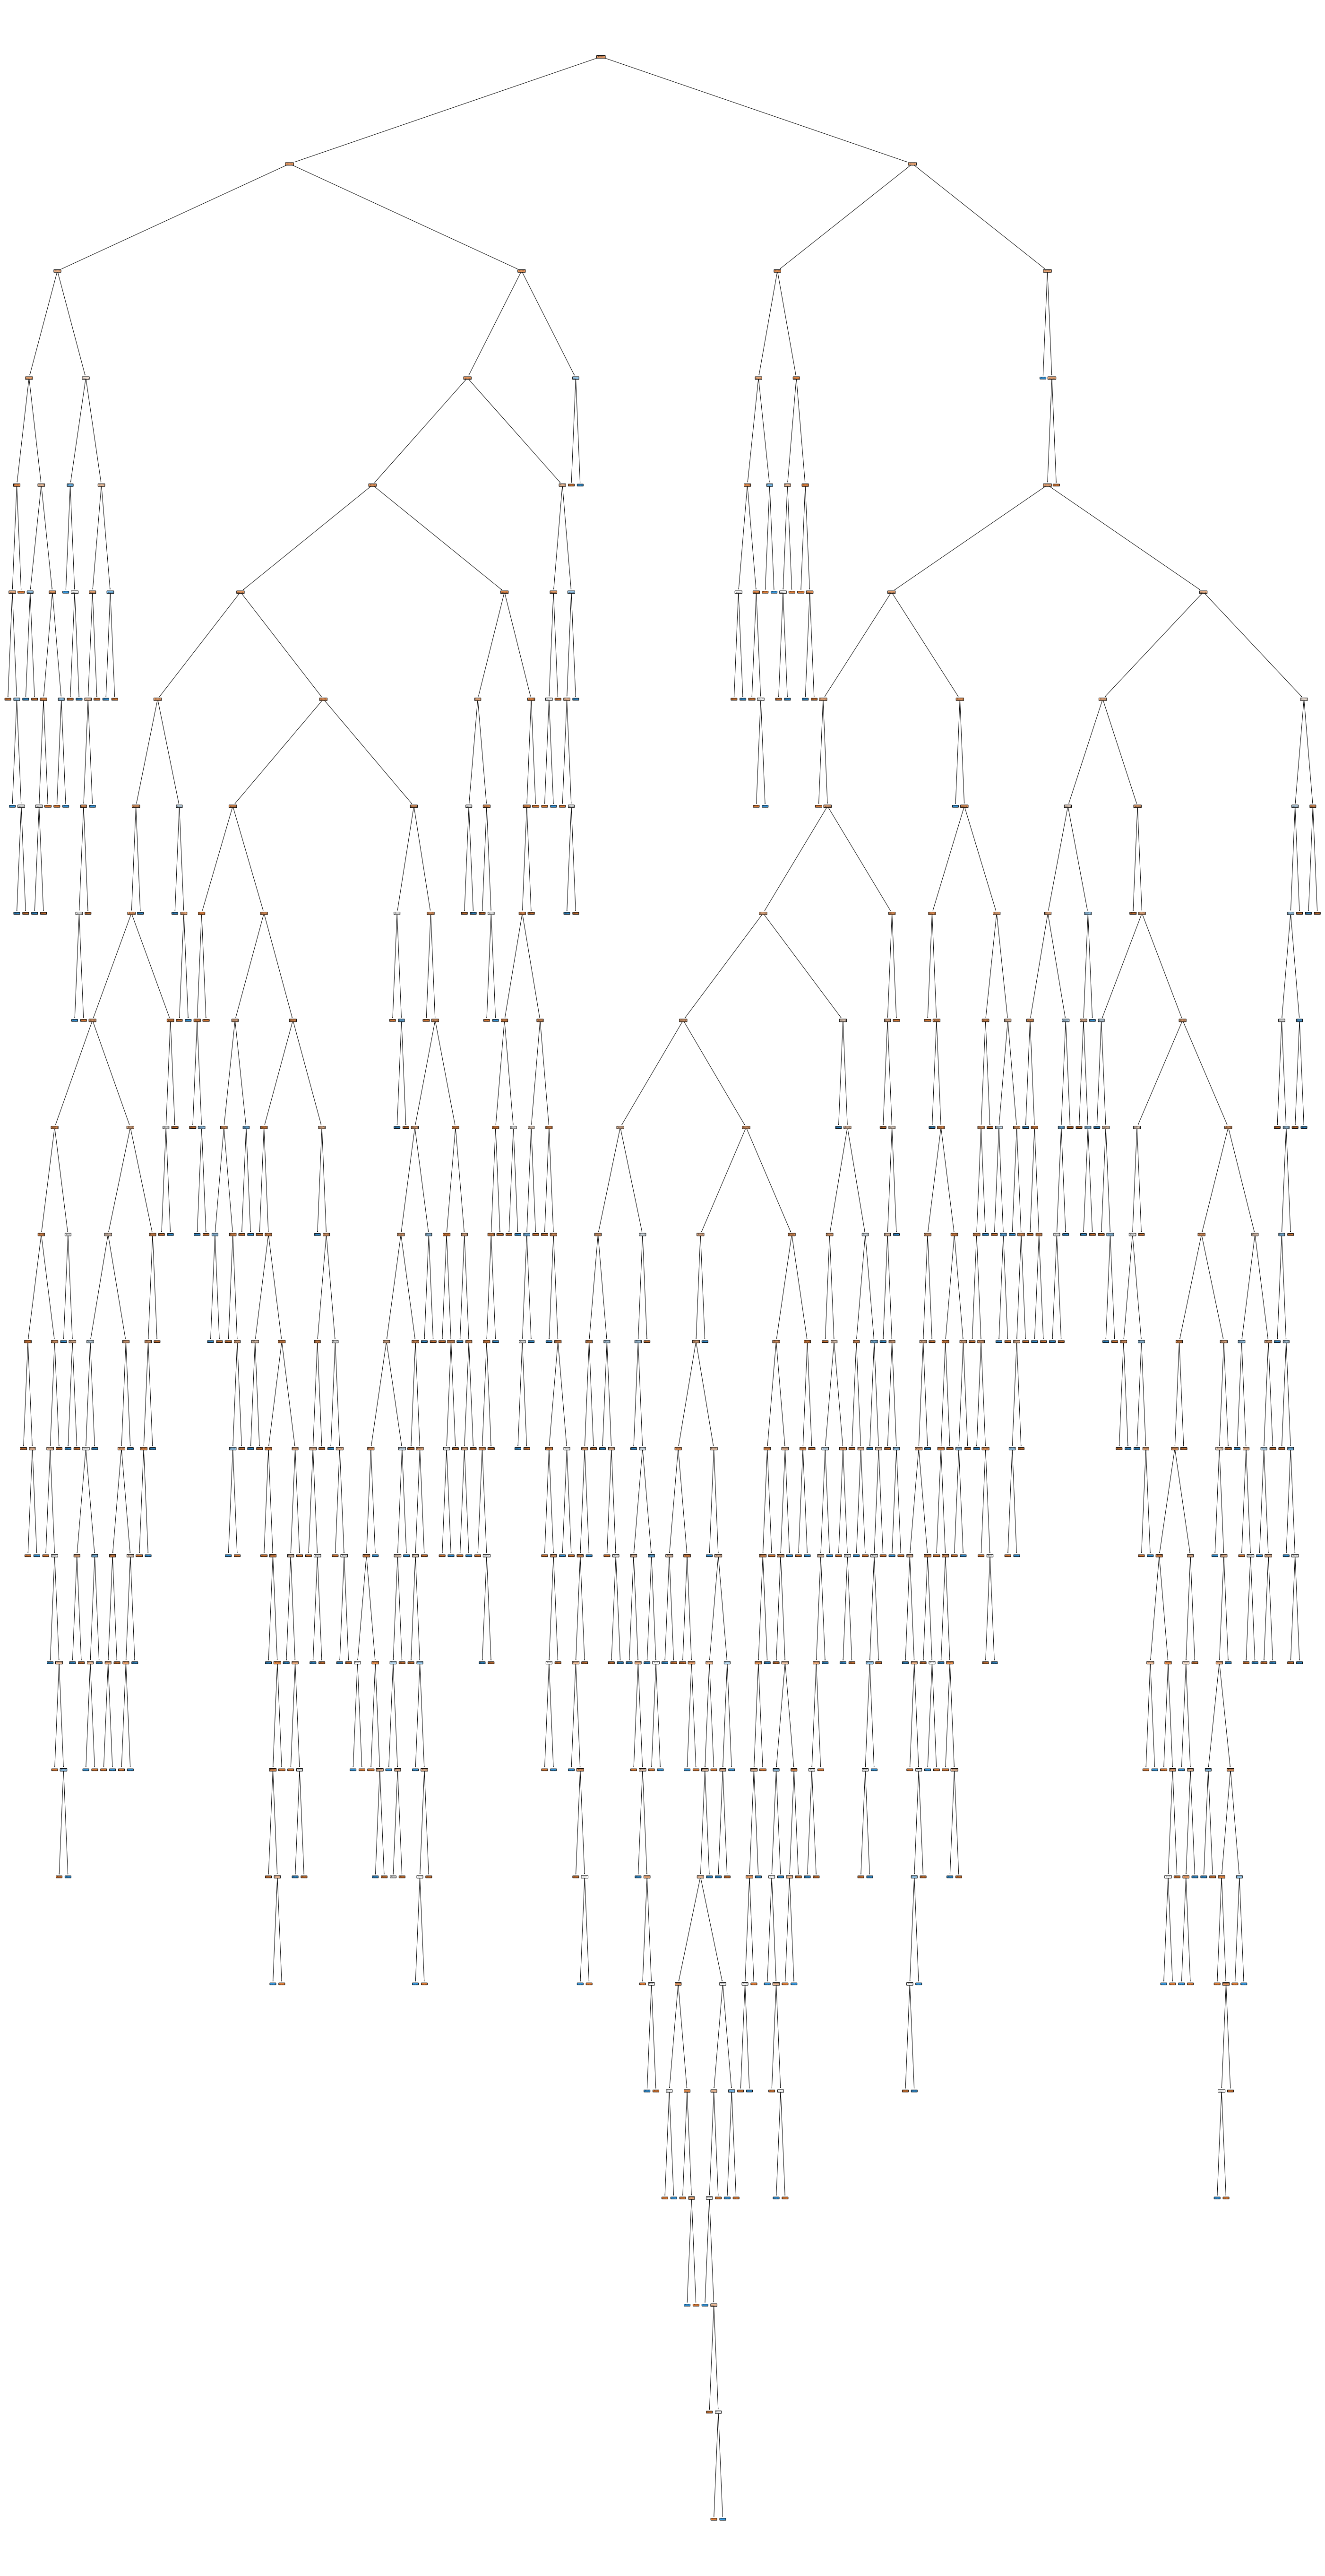

In [97]:
# plot tree
plt.figure(figsize=(50,100))
tree.plot_tree(dtc,filled=True,rounded=True,feature_names=x.columns)

In [98]:
ypred=dtc.predict(xtest) # testing predicted values

In [100]:
ypred # show ypred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [104]:
np.array(ytest) # testing values

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['yes'],
       ['no'],
       ['no']], dtype=object)

In [101]:
# import confusion_matrix ML alggorithom
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [103]:
print(classification_report(ytest,ypred)) # print classification_report

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      1007
         yes       1.00      1.00      1.00       261

    accuracy                           1.00      1268
   macro avg       1.00      1.00      1.00      1268
weighted avg       1.00      1.00      1.00      1268



In [105]:
dtc.score(xtest,ytest) # testing score

0.999211356466877

In [106]:
confusion_matrix(ytest,ypred) # confusion_matrix values

array([[1007,    0],
       [   1,  260]], dtype=int64)

In [107]:
(1007+260)/(1007+260+0+1) # confusion_matrix value Accuracy

0.999211356466877

In [108]:
heatmap=confusion_matrix(ytest,ypred) # confusion_matrix values heatmap

<AxesSubplot:>

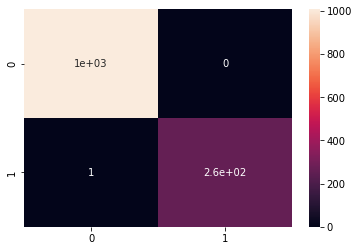

In [109]:
sb.heatmap(heatmap,annot=True) # confusion_matrix values heatmap

In [112]:
tp,fn,fp,tn=confusion_matrix(ytest,ypred).reshape(-1) # confusion_matrix 4 variables

In [113]:
tp,fn,fp,tn # show 4 variables values

(1007, 0, 1, 260)

In [80]:
tp/(tp+fp) # Precision or Positive Predictive Value (PPV)

0.9990079365079365

In [78]:
tn/(tn+fn) # (NPV)

1.0

In [81]:
tp/(tp+fn) # Sensitivity Recall Hit Rate or True Positive Rate(TPR)

1.0

In [82]:
fp/(fp+tn)#False Positive Rate (FPR) or 1-Specificity

0.0038314176245210726

In [44]:
(0.9990079365079365+1.0)/2 # F1 Measure = PPV+TPR/2

0.9995039682539683

In [46]:
(2*0.9990079365079365*1.0)/(0.9990079365079365+1.0)#Harmonic Mean, F1 Score

0.9995037220843672

In [51]:
tn/(tn+fp)#Specificity Selectivity or True Negative Rate (TNR)

0.9961685823754789

In [50]:
tp/(tp+fp+fn)#Threat Score (TS) or Critical Success Index (CSI)

0.9990079365079365

In [52]:
fp/(tp+fp)#False Discovery Rate (FDR)

0.000992063492063492

In [91]:
(tp+tn)/(tp+tn+fp+fn)# accuracy (ACC)

0.999211356466877

In [62]:
(tp+fp)/(tp+fn)/(tn+fp)/(tn+fn)#Matthews correlation coefficient (MCC)

1.4750855417910174e-05

In [90]:
(1.0+0.9961685823754789)/2 # balanced accuracy (BA),TPR+TNR BA=2

0.9980842911877394

In [85]:
(0.9990079365079365+0.9961685823754789)/1 # informedness or bookmaker informedness (BM),BM=TPR+TNR-1

1.9951765188834154

In [86]:
(0.9990079365079365+1.0)/1 # markedness (MK) or deltaP (Ap),MK = PPV + NPV - 1

1.9990079365079365

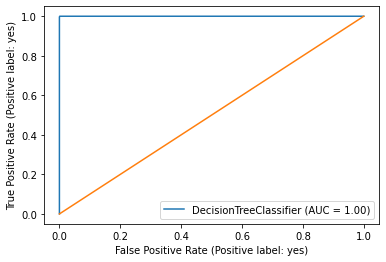

In [111]:
plot_roc_curve(dtc,xtest,ytest) # The Area Under the Curve (AUC)
plt.plot([0,1],[0,1])